In [7]:
import pandas as pd
import os
data_path = ['..', '..', 'data']
from sklearn.preprocessing import LabelBinarizer
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
data = pd.read_csv('teleCust1000t.csv')


In [3]:
data.head(1).T

,0
region,2.0
tenure,13.0
age,44.0
marital,1.0
address,9.0
income,64.0
ed,4.0
employ,5.0
retire,0.0
gender,0.0


In [4]:
warnings.filterwarnings('ignore', module='sklearn')
msc = MinMaxScaler()
data = pd.DataFrame(msc.fit_transform(data),columns=data.columns)

In [5]:
x_cols = [x for x in data.columns if x != 'custcat']
X_data = data[x_cols]
y_data = data['custcat']


In [8]:
threshold = 3.0
y_data_binary = np.where(y_data > threshold, 1, 0)

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data_binary)
y_pred = knn.predict(X_data)


In [9]:
def accuracy(real, predict):
    return sum(y_data_binary == y_pred) / float(real.shape[0])
    

In [10]:
print(accuracy(y_data_binary, y_pred))


1.0


In [11]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_data, y_data_binary)
y_pred = knn.predict(X_data)
print(accuracy(y_data_binary, y_pred))


1.0


In [12]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn = knn.fit(X_data, y_data_binary)
y_pred = knn.predict(X_data)
print(accuracy(y_data_binary, y_pred))


1.0


In [13]:
score_list = list()
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data_binary)
    y_pred = knn.predict(X_data)
    score = accuracy(y_data_binary, y_pred)
    score_list.append((k, score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])


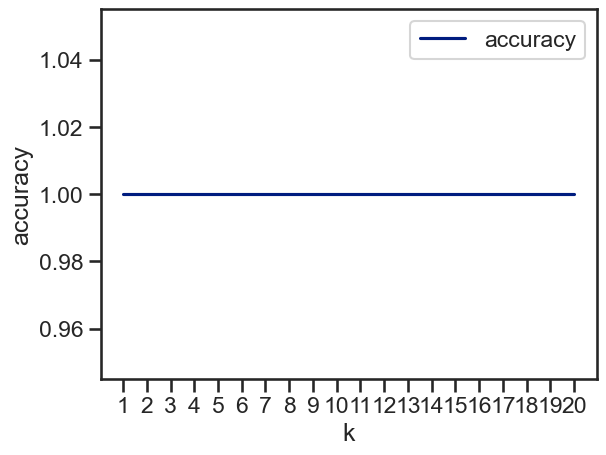

In [14]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));